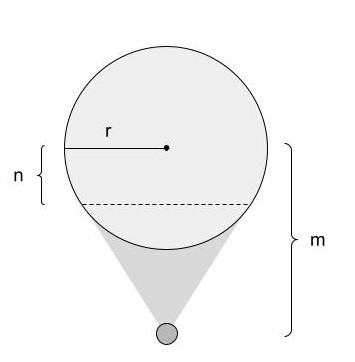

Plane of occlusion offset (relative to center of circular object) as a function of object radius, r, and distance from object center, m:

$$ n = r(1-cos(sin^{-1}(\frac{r}{m}))) $$

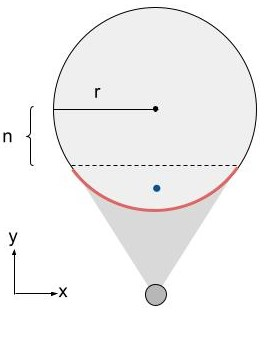

Calculating the mean location (drawn as dot) of all points lying on the visible surface (red arc):
$$ \mu = [\mu_x, \mu_y ] $$

If reference frame is centered below object:

$$ \mu_{x} = 0 $$

<!-- ## Wrong

Use equation for semicircle to get vertical component: 
$$ y = \sqrt{r^2 - x^2} $$

$$ \mu_{y} = \frac{1}{|x_{y = r} - x_{y = n}|} \int _{x_{y = r}} ^{x_{y = n}} \sqrt{r^2 - x^2} dx $$ 

$$  = \frac{1}{\sqrt{r^2 - n^2}} \int ^{\sqrt{r^2 - n^2}} _{0} \sqrt{r^2 -x^2} dx $$ 

$$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} x \sqrt{r^2 - x^2} + r^2 sin^{-1} \bigg(\frac{x}{r} \bigg) \bigg] \bigg\rvert^{\sqrt{r^2 - n^2}}_{0} $$ 
-->
<!-- $$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} n \sqrt{r^2 - n^2} + tan^{-1} \bigg(\frac{\sqrt{r^2 - n^2}}{\sqrt{2r^2 - n^2}} \bigg) \bigg]  $$ -->

<!-- $$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} n \sqrt{r^2 - n^2} + (r^2 - n^2) sin^{-1} \bigg(\frac{\sqrt{r^2 - n^2}}{r} \bigg) \bigg]  $$ -->





$$ \mu_y = \frac{ \int _{x_{y = n}} ^{r} 2xy dy}{Area} $$ 

$$ \mu_y = \frac{\int _{rcos(tan^{-1}(\frac{n}{r}))} ^{r} 2y \sqrt{r^2 - y^2} dy}{Area} $$

$$ \mu_y = \frac{ \frac{-2}{3} \bigg{(}r^2 - y^2\bigg{)}^{\frac{3}{2}}  \bigg\rvert^{r}_{r*cos(tan^{-1}(\frac{n}{r}))}} { \bigg{(}\frac{\pi}{2}-tan^{-1}(\frac{n}{r}) \bigg{)} - \bigg{(}n*r*cos(tan^{-1}(\frac{n}{r}))\bigg{)} } $$

In [286]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [300]:
def get_n(m, r):
    """calculates plane of occlusion offset as a function of cicrular object radius 
    and distance from object center"""
    n = r*(1-np.cos(np.arcsin(r/m)))
#     n = r*(np.cos(np.arcsin(r/m)))
    return n
    
def get_mu(m,r):
    """returns offset between circular object center and observed distribution center"""
    n = get_n(m,r)
#     temp = np.sqrt(r**2 - n**2)
#     mu_y = (1/temp)*((0.5*n*temp) + np.arctan(temp/ np.sqrt(2*(r**2) - n**2 )))

#     bound = r*np.cos(np.arctan(n/r))
#     mu_y = (1/bound)*(0.5*bound*np.sqrt(r**2 - bound**2) + r**2*np.arcsin(np.sqrt(bound)/r))
    
    mu_y = (-2/3)*(r**2 - ( n * r * np.cos(np.arctan(n/r)) )**2)**(3/2)

    mu_x = 0.0
    mu = np.array([[mu_x, mu_y]])
    return mu
    

Plane of occlusion offset: 0.3586963867034203
Distribution center: [[ 0.         -4.36786002]]


<IPython.core.display.Javascript object>


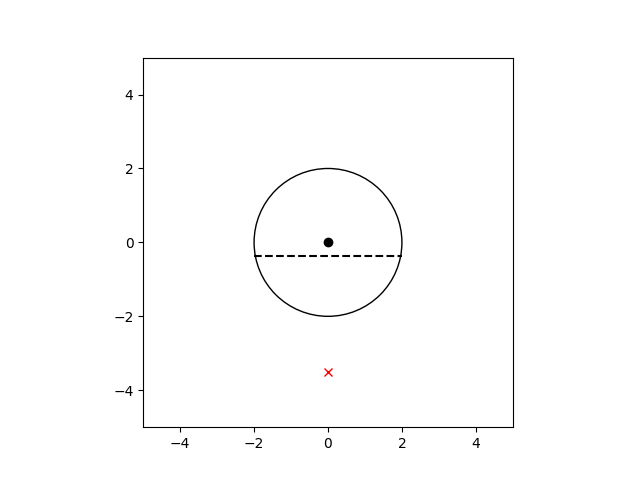

In [357]:
r = 2 #object radius
m = 3.5 #distance from object center
n = get_n(m,r) #plane of occlusion offset
print("Plane of occlusion offset:", n)

mu = get_mu(m,r)
print("Distribution center:", mu)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
circle = plt.Circle((0,0),r, fill = False)
ax.add_patch(circle)

ax.plot(0, -m, 'rx')
# ax.plot([-r,r], [0, 0], 'k-')
ax.plot(0,0,'ko')
ax.plot([-r,r], [-n, -n], 'k--')
# ax.plot(mu, 'ro')

[ 0.03507735 -0.63508336]


<IPython.core.display.Javascript object>


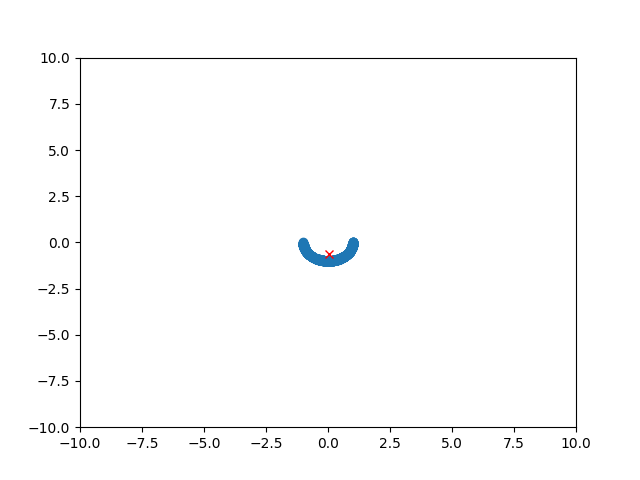

In [302]:
#verify numerically that get_mu is working correctly

rad = 1

# #Uniform spread of points from OBSERVER POV  ~~~~~~~~~~~~~~~~~~~~~
# x = 2*rad*np.random.rand(1000) - rad
# y = -np.sqrt(rad**2 - x**2)
# pts = np.array([x, y]).T
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#Uniform spread about SURFACE OF ARC ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
roll = np.pi*np.random.rand(1000) + np.pi/2
pts = np.array([rad*np.sin(roll), rad*np.cos(roll)]).T
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#move occlusion plane
# pts = pts[pts[:,1] < -3.5]

mu = np.mean(pts, axis = 0)
print(mu)

fig, ax = plt.subplots()
# ax.set_aspect('equal')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.scatter(pts[:,0],pts[:,1])

ax.plot(mu[0],mu[1], 'rx')


# Notes

Is my method of integration not sampling evenly???

Use 3rd moment of each distribution to determine how circular each shape is